# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

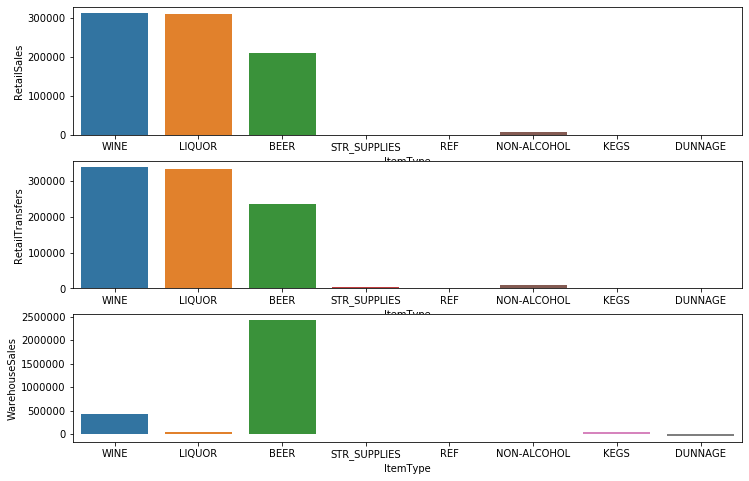

In [3]:
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(12,8))

plt.sca(axes[0])
sns.barplot(x = 'ItemType', y='RetailSales', data=data, ci=None, estimator=sum)
plt.sca(axes[1])
sns.barplot(x = 'ItemType', y='RetailTransfers', data=data, ci=None, estimator=sum)
plt.sca(axes[2])
sns.barplot(x = 'ItemType', y='WarehouseSales', data=data, ci=None, estimator=sum)
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

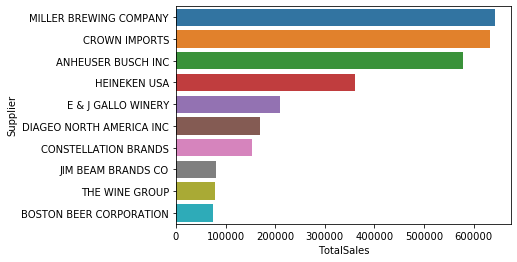

In [4]:
# Creating new dataframe, with top 10 suppliers and total sales column
top_sup = data.groupby(by='Supplier').sum().reset_index()
top_sup['TotalSales'] = top_sup.RetailSales + top_sup.WarehouseSales + top_sup.RetailSales
top_sup = top_sup.sort_values(by='TotalSales',ascending=False).head(10)

sns.barplot(x = 'TotalSales', y='Supplier', data=top_sup, ci=None, estimator=sum)
plt.show()

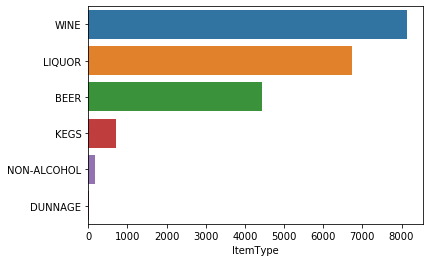

In [5]:
#now we filter the top 10 suppliers and count the sales mix
top_sup = data.groupby(by='Supplier').sum().reset_index()
top_sup['TotalSales'] = top_sup.RetailSales + top_sup.WarehouseSales + top_sup.RetailSales
mask = data.Supplier.isin(top_sup.sort_values(by='TotalSales',ascending=False).head(10).Supplier)

sales_mix_top10 = data.loc[mask,'ItemType'].value_counts()

sns.barplot(y=sales_mix_top10.index,x=sales_mix_top10)
plt.show()

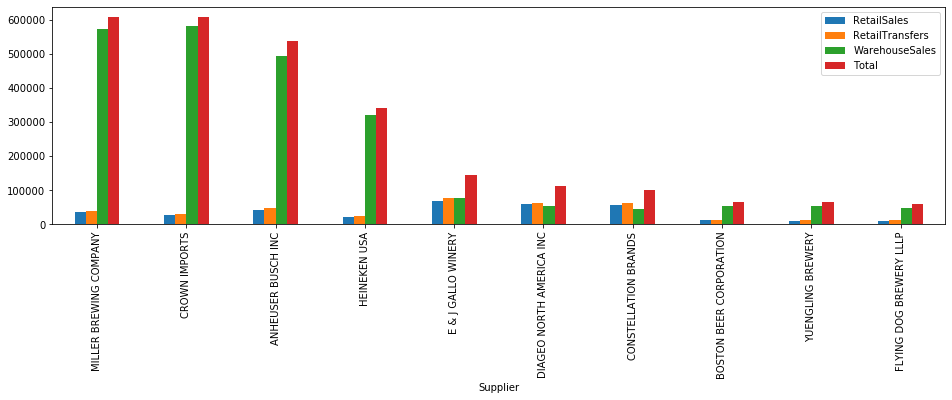

In [6]:
#Another way... (just to stay recorded here)

top_10_sup = data.groupby('Supplier')[['RetailSales','RetailTransfers','WarehouseSales']].sum()
top_10_sup['Total'] = top_10_sup['RetailSales'] + top_10_sup['WarehouseSales']
top_10_sup = top_10_sup.sort_values(by='Total',ascending=False).head(10)
top_10_sup.plot(kind='bar',figsize=(16,4))

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

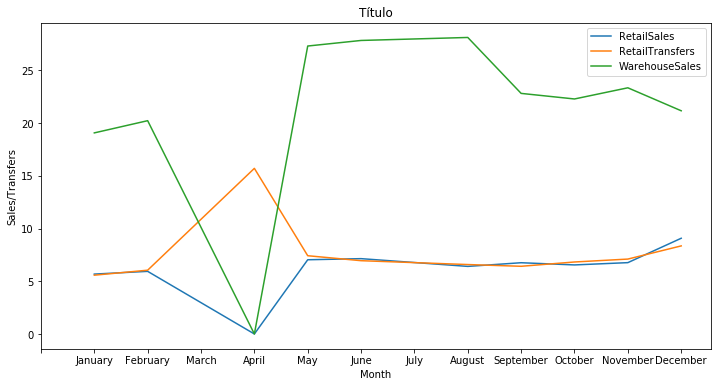

In [7]:
#prepare data
avg_sales = data.groupby(by='Month')['RetailSales', 'RetailTransfers', 'WarehouseSales'].mean()

#prepare plot data
avg_sales.plot(kind='line',figsize=(12,6))

#Labels
plt.xlabel('Month')
plt.ylabel('Sales/Transfers')
plt.title('Título')
plt.xticks(np.arange(13), ['','January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'])

#plot data
plt.show()

## 4. Plot the same information above but as a bar chart.

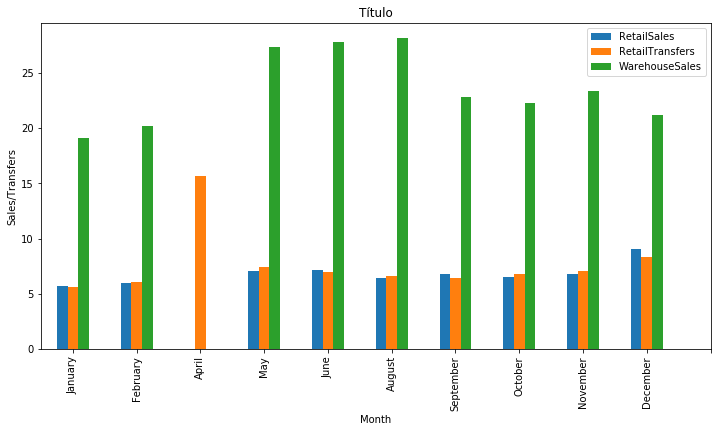

In [8]:
#prepare plot data
avg_sales.plot(kind='bar',figsize=(12,6))

#Labels
plt.xlabel('Month')
plt.ylabel('Sales/Transfers')
plt.title('Título')
plt.xticks(np.arange(11), ['January', 'February', 'April', 'May', 'June','August', 'September', 'October', 'November', 'December'])

#plot data
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

[]

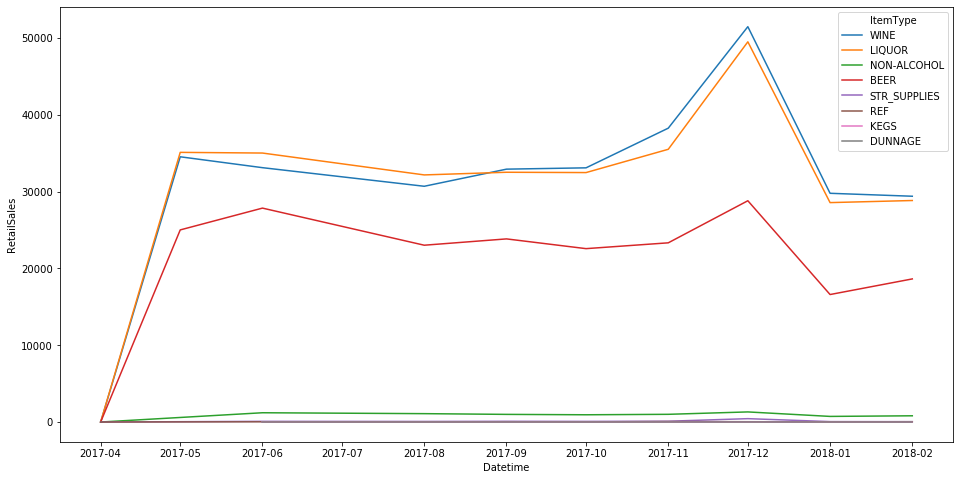

In [9]:
#Separate the data
df = data.copy()
df['Datetime'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df =df.sort_values(by='Datetime')
monthly_ret_sls = df.groupby(by=['Datetime','ItemType'],sort=False).sum().RetailSales

#bob is the name of my immaginary duckdebbug
bob = monthly_ret_sls.reset_index()

#Plot the graphic
plt.subplots(figsize=(16,8))
sns.lineplot(x='Datetime',y='RetailSales',data=bob, hue='ItemType')
plt.plot()

## 6. Plot the same information as above but as a bar chart.

In [15]:
xlab

['2017-4',
 '2017-5',
 '2017-6',
 '2017-8',
 '2017-9',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-1',
 '2018-2']

In [28]:
bob.groupby(by=['Datetime','ItemType']).sum()

RetailSales
Datetime   ItemType                 
2017-04-01 BEER                 0.00
           LIQUOR               0.00
           NON-ALCOHOL          0.00
           REF                  0.00
           STR_SUPPLIES         0.00
...                              ...
2018-02-01 LIQUOR           28852.31
           NON-ALCOHOL        812.84
           REF                 41.52
           STR_SUPPLIES        47.76
           WINE             29409.39

[73 rows x 1 columns]

[]

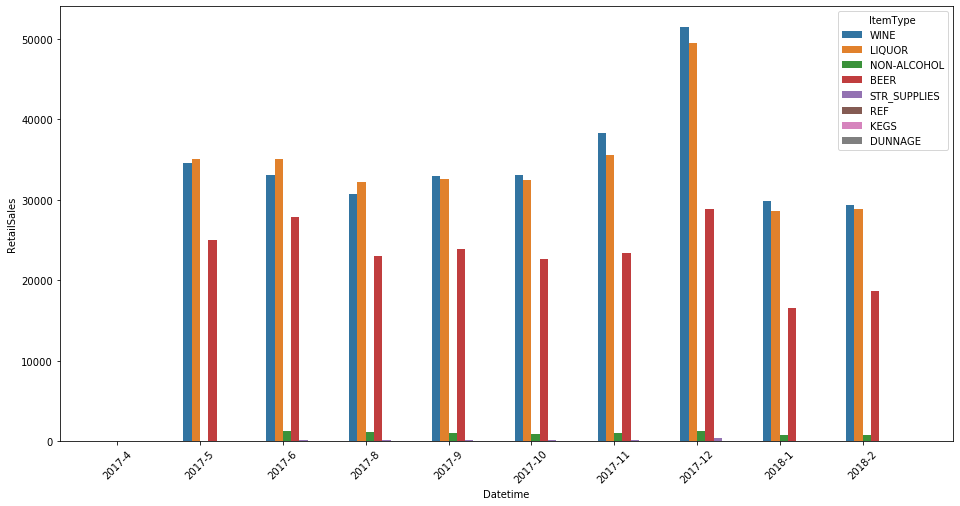

In [37]:
#Plot the graphic
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x='Datetime',y='RetailSales',data=bob, hue='ItemType',estimator=sum)

#get times... month and year
xlab = [str(time.year) + '-'+ str(time.month) for time in pd.DatetimeIndex(bob.Datetime.unique())]

#now we set the x-axis
plt.xticks(np.arange(10)-0.2, xlab, rotation=45)
plt.plot()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [11]:
# Using df again...
df_scatter = df.loc[:,['Datetime', 'ItemType','RetailSales', 'RetailTransfers']]
df_scatter = df_scatter.groupby(by=['Datetime','ItemType']).sum().reset_index()
df_scatter

,Datetime,ItemType,RetailSales,RetailTransfers
0,2017-04-01,BEER,0.00,20045.00
1,2017-04-01,LIQUOR,0.00,29568.82
2,2017-04-01,NON-ALCOHOL,0.00,1031.00
3,2017-04-01,REF,0.00,13.00
4,2017-04-01,STR_SUPPLIES,0.00,293.00
...,...,...,...,...
68,2018-02-01,LIQUOR,28852.31,29295.05
69,2018-02-01,NON-ALCOHOL,812.84,893.66
70,2018-02-01,REF,41.52,20.00
71,2018-02-01,STR_SUPPLIES,47.76,409.00


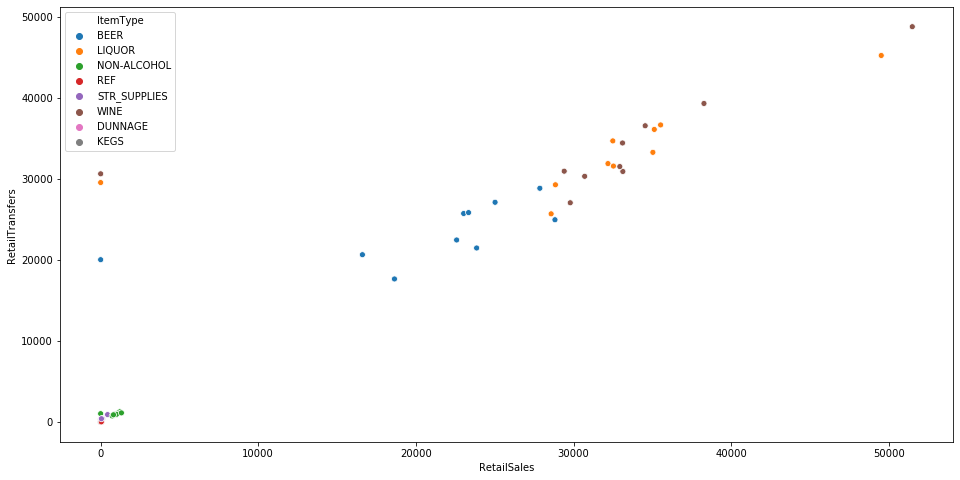

In [12]:
plt.subplots(figsize=(16,8))
sns.scatterplot(x='RetailSales',y='RetailTransfers', data=df_scatter, hue='ItemType')

plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

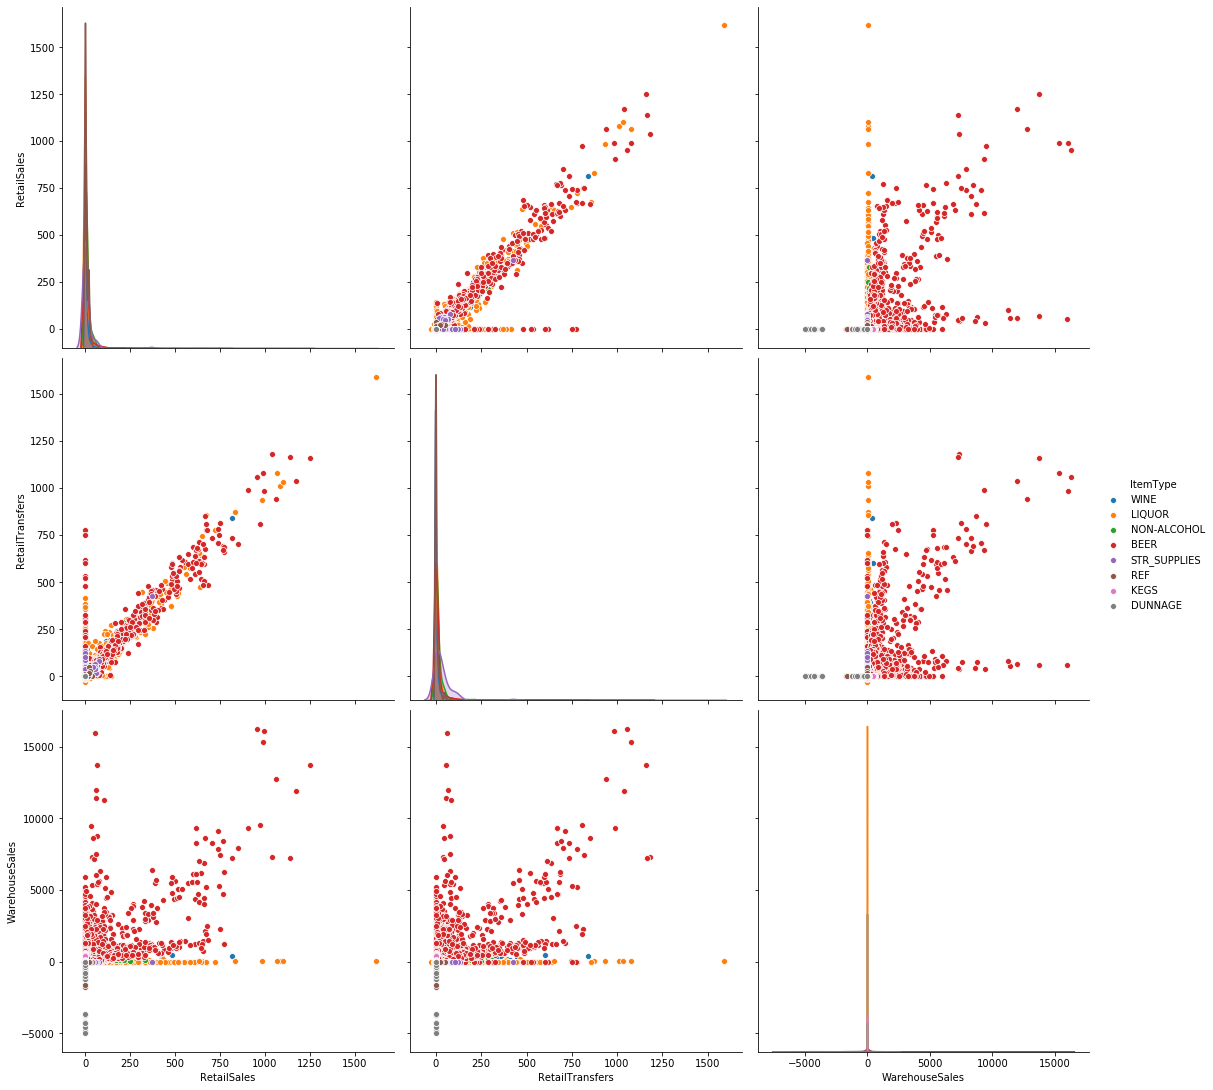

In [68]:
#selecting numeric data and hue(ItemType)
num_data = df.loc[:,['Datetime', 'ItemType', 'RetailSales', 'RetailTransfers', 'WarehouseSales']]


#plotting the graph

sns.pairplot(data=num_data,kind='scatter', hue='ItemType',height=5)
plt.show()